In [9]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# Load Titanic dataset
titanic_df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Filter out missing values in the Fare and Pclass columns
filtered_titanic_df = titanic_df.dropna(subset=['Fare', 'Pclass'])
print(filtered_titanic_df)


#Filtering the Titanic dataset using filtered_titanic_df is done to remove any rows with missing values in the columns we are interested 
#in, namely 'Fare' and 'Pclass'. This step ensures that we have complete data for the analysis, as missing values could potentially affect
#the accuracy of our results.

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [10]:
# Group fares by passenger class
grouped_fares = [filtered_titanic_df[filtered_titanic_df['Pclass'] == i]['Fare'] for i in [1, 2, 3]]
print(grouped_fares)

#The grouped_fares variable is created to organize the fares from the Titanic dataset into groups based
#on the passengers' classes. This grouping is necessary for conducting a one-way ANOVA analysis, which 
#compares the means of a continuous variable (in this case, fare prices) across different groups (in this case, passenger classes).

[1      71.2833
3      53.1000
6      51.8625
11     26.5500
23     35.5000
        ...   
871    52.5542
872     5.0000
879    83.1583
887    30.0000
889    30.0000
Name: Fare, Length: 216, dtype: float64, 9      30.0708
15     16.0000
17     13.0000
20     26.0000
21     13.0000
        ...   
866    13.8583
874    24.0000
880    26.0000
883    10.5000
886    13.0000
Name: Fare, Length: 184, dtype: float64, 0       7.2500
2       7.9250
4       8.0500
5       8.4583
7      21.0750
        ...   
882    10.5167
884     7.0500
885    29.1250
888    23.4500
890     7.7500
Name: Fare, Length: 491, dtype: float64]


In [11]:
# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*grouped_fares)

print("F-statistic:", f_statistic)
print("P-value:", p_value)
#F-statistic: This value represents the ratio of the variance between groups to the variance within groups. 
#A larger F-statistic indicates a greater difference between the means of the groups relative to the variation within the groups.
#P-value: This value represents the probability of observing the given F-statistic or a more extreme value
#if the null hypothesis (that all group means are equal) were true. A small p-value (typically less than 0.05) 
#suggests that there is sufficient evidence to reject the null hypothesis and conclude that there are significant differences
#between at least two of the groups.


F-statistic: 242.34415651744814
P-value: 1.0313763209141171e-84


In [4]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load Titanic dataset
titanic_df = pd.read_csv('titanic.csv')

# Filter out missing values in the Fare, Pclass, and Survived columns
filtered_titanic_df = titanic_df.dropna(subset=['Fare', 'Pclass', 'Survived'])

# Fit the ANOVA model
model = ols('Fare ~ C(Pclass) + C(Survived) + C(Pclass):C(Survived)', data=filtered_titanic_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)


ModuleNotFoundError: No module named 'statsmodels'

In [6]:
pip install statsmodels


   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 393.8 kB/s eta 0:00:25
    --------------------------------------- 0.2/9.8 MB 1.7 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/9.8 MB 3.7 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/9.8 MB 5.4 MB/s eta 0:00:02
   ------ --------------------------------- 1.7/9.8 MB 6.6 MB/s eta 0:00:02
   -------- ------------------------------- 2.1/9.8 MB 7.1 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.8 MB 7.5 MB/s eta 0:00:01
   ------------ --------------------------- 3.1/9.8 MB 8.0 MB/s eta 0:00:01
   -------------- ------------------------- 3.5/9.8 MB 8.3 MB/s eta 0:00:01
   -------------- ------------------------- 3.7/9.8 MB 7.5 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.8 MB 9.1 MB/s eta 0:00:01
   -------------------- 


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load Titanic dataset
titanic_df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Filter out missing values in the Fare, Pclass, and Survived columns
filtered_titanic_df = titanic_df.dropna(subset=['Fare', 'Pclass', 'Survived'])

# Fit the ANOVA model
model = ols('Fare ~ C(Pclass) + C(Survived) + C(Pclass):C(Survived)', data=filtered_titanic_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                             sum_sq     df           F        PR(>F)
C(Pclass)              6.456848e+05    2.0  208.053483  8.687480e-75
C(Survived)            1.516366e+04    1.0    9.772110  1.829623e-03
C(Pclass):C(Survived)  3.332581e+04    2.0   10.738290  2.466646e-05
Residual               1.373279e+06  885.0         NaN           NaN


In [11]:
#In this code:two way anova

#We load the Titanic dataset using Pandas.
#We filter out any missing values in the 'Fare', 'Pclass', and 'Survived' columns.
#We fit an ANOVA model using the ols function from statsmodels. The formula Fare ~ C(Pclass) + C(Survived) + C(Pclass):C(Survived) specifies that we're interested in the effects of both Pclass and Survived, as well as their interaction.
#We use sm.stats.anova_lm to compute the ANOVA table.
#Finally, we print out the ANOVA table, which includes the sum of squares, degrees of freedom, mean squares, F-statistic, and p-value for each factor and interaction.
#This ANOVA will help us determine if there are significant differences in fares between passenger classes, survival status, and if the interaction between these two factors has a significant effect on fares.

#In this code:

#We load the Titanic dataset using Pandas.
#We filter out any missing values in the 'Fare' and 'Pclass' columns.
#We group the fares by passenger class (1st, 2nd, and 3rd).
#We use the f_oneway function from SciPy to perform the one-way ANOVA on the grouped fares.
#Finally, we print out the F-statistic and the p-value.
#The null hypothesis (H0) in the context of this ANOVA would be that there is no significant difference in the mean fares between the different passenger classes. If the p-value is less than a chosen significance level (e.g., 0.05), we reject the null hypothesis, indicating that there is significant evidence to suggest that at least one pair of means is significantly different.

In [2]:
import pandas as pd

# Load the Titanic dataset (assuming it's in a CSV file named 'titanic.csv')
titanic_df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

# Assuming you want to find the trend value based on a specific feature, such as age or fare
trend_value = titanic_df['Age'].mean()  # You can replace 'Age' with any other feature

# Calculate the ratio of each data point to the trend value
titanic_df['Ratio_to_Trend'] = titanic_df['Age'] / trend_value

# Display the first few rows of the dataset with the calculated ratio
print(titanic_df[['Age', 'Ratio_to_Trend']].head())


    Age  Ratio_to_Trend
0  22.0        0.740763
1  38.0        1.279499
2  26.0        0.875447
3  35.0        1.178486
4  35.0        1.178486


In [12]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [20]:
df =  pd.read_csv("titanic.csv")

In [21]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [37]:
#H0 = THERE IS NO SIGNIFACANT DIFFERENCE IN FARE ACROSS DIFFERENT PASSENGER CLASSES
#H1 = THERE IS SIGNIFICANT DIFFERENCE IN ATLEAST ONE CLASS
mod = ols('Pclass~Fare',data = df).fit()

In [38]:
aov_table = sm.stats.anova_lm(mod, type =2)
print(aov_table)

             df      sum_sq     mean_sq           F        PR(>F)
Fare        1.0  187.850073  187.850073  384.547434  1.967386e-71
Residual  889.0  434.273383    0.488496         NaN           NaN


<Axes: title={'center': 'Fare'}, xlabel='Pclass'>

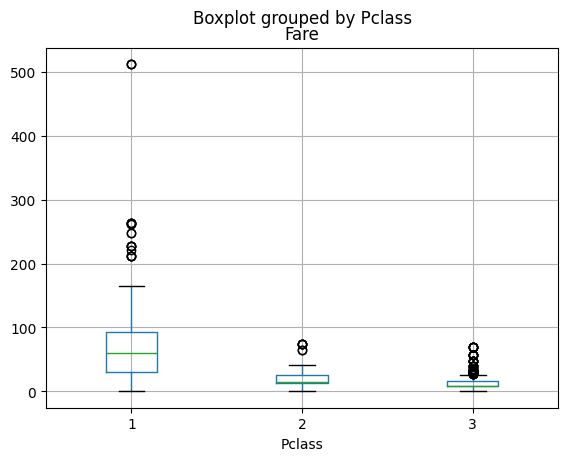

In [45]:

%matplotlib inline
df.boxplot('Fare', by = 'Pclass')

In [46]:
new = ols('Fare ~ Pclass' , data = df).fit()
an = sm.stats.anova_lm(new,typ = 2)

In [47]:
an

,sum_sq,df,F,PR(>F)
Pclass,6.636250e+05,1.0,384.547434,1.967386e-71
Residual,1.534174e+06,889.0,NaN,NaN


In [48]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# Load Titanic dataset
titanic_df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Filter out missing values in the Fare and Pclass columns
filtered_titanic_df = titanic_df.dropna(subset=['Fare', 'Pclass'])

# Group fares by passenger class
grouped_fares = [filtered_titanic_df[filtered_titanic_df['Pclass'] == i]['Fare'] for i in [1, 2, 3]]

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(*grouped_fares)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 242.34415651744814
P-value: 1.0313763209141171e-84


In [49]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load Titanic dataset
titanic_df = pd.read_csv('titanic.csv')

# Drop rows with missing values in relevant columns
titanic_df.dropna(subset=['Fare', 'Pclass', 'Survived'], inplace=True)

# Fit the ANOVA model
formula = 'Fare ~ C(Pclass) + C(Survived) + C(Pclass):C(Survived)'
model = ols(formula, data=titanic_df).fit()

# Perform ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                             sum_sq     df           F        PR(>F)
C(Pclass)              6.456848e+05    2.0  208.053483  8.687480e-75
C(Survived)            1.516366e+04    1.0    9.772110  1.829623e-03
C(Pclass):C(Survived)  3.332581e+04    2.0   10.738290  2.466646e-05
Residual               1.373279e+06  885.0         NaN           NaN
